In [1]:
#importing modules

import os
import pandas as pd
import warnings

In [2]:
#importing functions

from room_palette import extract_room_colors
from wall_segmenter import walls
from wall_color import extract_wall_color

In [3]:
import os
import pandas as pd

def process_images(img_dir, output_csv):
    # Initialize a counter
    image_count = 0

    # Iterate over each image in the image directory
    for img_filename in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_filename)

        # Check only image files
        if img_path.endswith(('.jpg', '.png', '.jpeg')):
            print(f"Processing: {img_filename}")
            
            # Segment each image, store mask (walls) and segmented image (room)
            warnings.filterwarnings("ignore", category=FutureWarning)
            mask, seg = walls(img_path)
            dominant_wall_color = extract_wall_color(mask)
            room_palette = extract_room_colors(seg,4)

            # Create a single-row DataFrame consisting of the extracted info
            new_row = {'image_path': img_path, 'room_colors': room_palette, 'wall_color': dominant_wall_color}
            df = pd.DataFrame([new_row])

            # Writing output to CSV file
            if not os.path.isfile(output_csv):
                # Write header only for the first time (file doesn't exist)
                df.to_csv(output_csv, mode='w', header=True, index=False)
                print('CSV file created.')
            else:
                # Append new rows without writing the header
                df.to_csv(output_csv, mode='a', header=False, index=False)
                print('Row added.')

            # Increment the counter
            image_count += 1

            # Stop processing after 5 images
            if image_count >= 5:
                print('Processed 5 images. Stopping.')
                break


Processing: image_20240923_151727_117811.jpg
segmenting walls from image...
Building encoder: resnet50-dilated
Loading weights for net_encoder
Loading weights for net_decoder


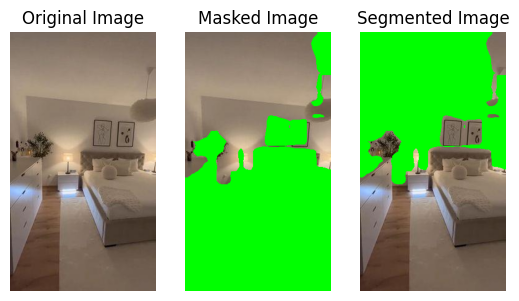

wall color (RGB):  [152 133 115]


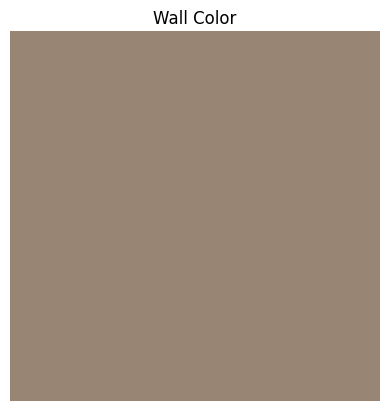

extracting room's color palette...
RGB values of dominant colors:
 [[139 116  99]
 [ 91  65  49]
 [187 185 194]
 [148 127 110]]


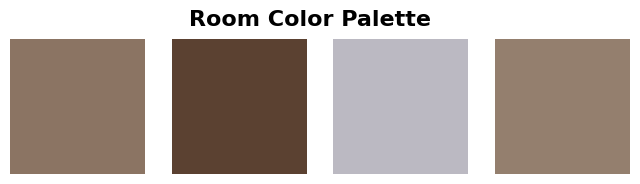

CSV file created.
Processing: image_20240923_151730_265093.jpg
segmenting walls from image...
Building encoder: resnet50-dilated
Loading weights for net_encoder
Loading weights for net_decoder


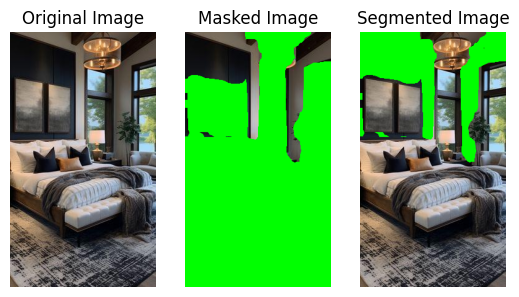

wall color (RGB):  [61 56 53]


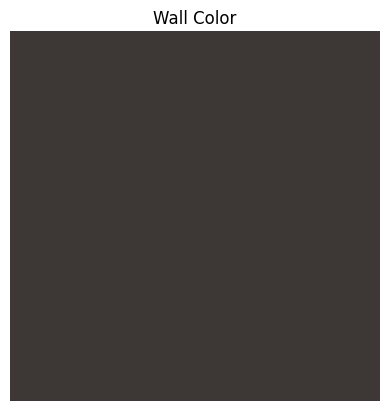

extracting room's color palette...
RGB values of dominant colors:
 [[ 87  83  83]
 [165 153 121]
 [199 229 245]
 [190 176 166]]


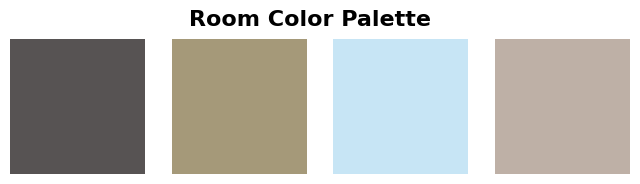

Row added.
Processing: image_20240923_151731_557299.jpg
segmenting walls from image...
Building encoder: resnet50-dilated
Loading weights for net_encoder
Loading weights for net_decoder


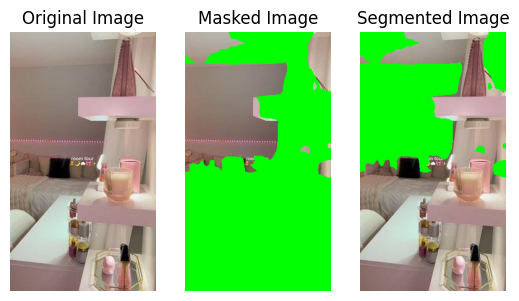

wall color (RGB):  [149 129 120]


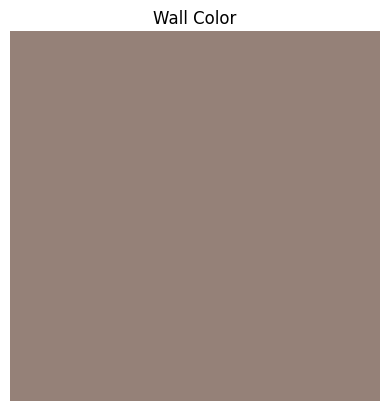

extracting room's color palette...
RGB values of dominant colors:
 [[197 158 161]
 [229 240 230]
 [170 128 111]
 [197 179 164]]


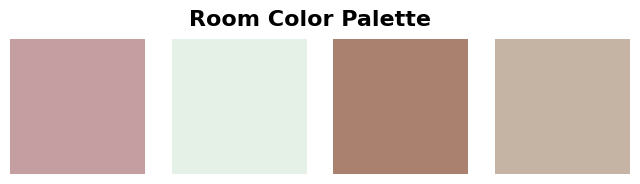

Row added.
Processing: image_20240923_151732_349306.jpg
segmenting walls from image...
Building encoder: resnet50-dilated
Loading weights for net_encoder
Loading weights for net_decoder


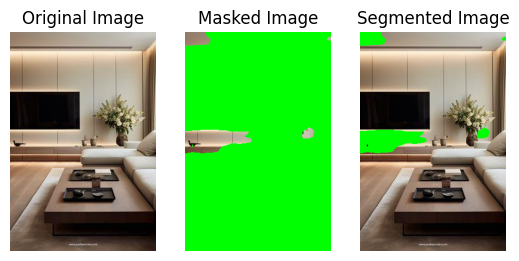

wall color (RGB):  [175 153 131]


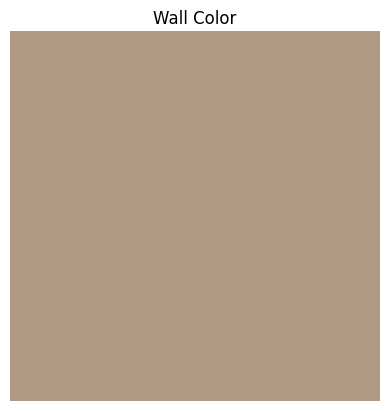

extracting room's color palette...
RGB values of dominant colors:
 [[173 142 107]
 [255 241 210]
 [208 196 179]
 [151 125 103]]


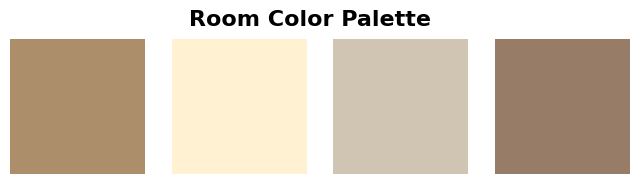

Row added.
Processing: image_20240923_151732_956396.jpg
segmenting walls from image...
Building encoder: resnet50-dilated
Loading weights for net_encoder
Loading weights for net_decoder


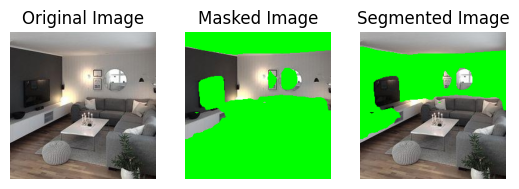

wall color (RGB):  [126 120 115]


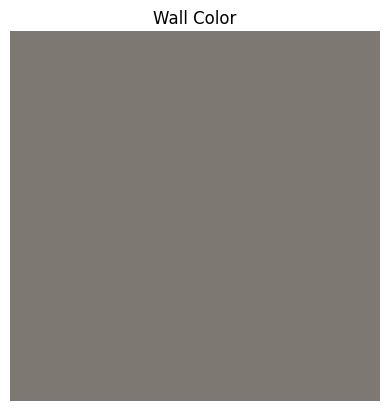

extracting room's color palette...
RGB values of dominant colors:
 [[238 227 214]
 [139 138 136]
 [151 134 123]
 [196 198 199]]


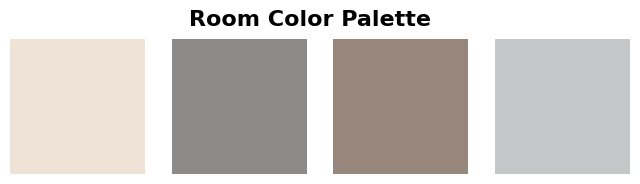

Row added.
Processed 5 images. Stopping.


In [4]:
img_dir=r'pinterest_images'
op_csv="dataset.csv"

process_images(img_dir,op_csv)

In [9]:
df=pd.read_csv("dataset.csv")
print(len(df), "rows found.")

5 rows found.


In [6]:
df

,image_path,room_colors,wall_color
0,pinterest_images\image_20240923_151727_117811.jpg,"[(139, 116, 99), (91, 65, 49), (187, 185, 194)...","(152, 133, 115)"
1,pinterest_images\image_20240923_151730_265093.jpg,"[(87, 83, 83), (165, 153, 121), (199, 229, 245...","(61, 56, 53)"
2,pinterest_images\image_20240923_151731_557299.jpg,"[(197, 158, 161), (229, 240, 230), (170, 128, ...","(149, 129, 120)"
3,pinterest_images\image_20240923_151732_349306.jpg,"[(173, 142, 107), (255, 241, 210), (208, 196, ...","(175, 153, 131)"
4,pinterest_images\image_20240923_151732_956396.jpg,"[(238, 227, 214), (139, 138, 136), (151, 134, ...","(126, 120, 115)"
